In [2]:
# Import the necessary libraries if you are starting a new notebook.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the continuous and discrete variables into continuous_df and discrete_df variables.
url = "../03-cleaning-categorical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv"
df = pd.read_csv(url)

def split_text_on_uppercase(s, keep_contiguous=False):
    """

    Args:
        s (str): string
        keep_contiguous (bool): flag to indicate we want to 
                                keep contiguous uppercase chars together

    Returns:

    """

    string_length = len(s)
    is_lower_around = (lambda: s[i-1].islower() or 
                       string_length > (i + 1) and s[i + 1].islower())

    start = 0
    parts = []
    for i in range(1, string_length):
        if s[i].isupper() and (not keep_contiguous or is_lower_around()):
            parts.append(s[start: i])
            start = i
    parts.append(s[start:])

    return "_".join(parts).lower()

def standardize_columns(cols):
    lst_std_columns=[]
    for c in cols:
        lst_std_columns.append(
            split_text_on_uppercase(c, True).replace(" ", "").replace("numberof", "qty"))
    return lst_std_columns

df.columns = standardize_columns(df.columns)
customer_df = df.copy()
customer_df = customer_df.set_index("customer")
customer_df.effective_to_date =  pd.to_datetime(
    customer_df.effective_to_date)
customer_df_numerical = customer_df.select_dtypes(np.number)
customer_df_categorical = customer_df.select_dtypes(object)
customer_df_date = customer_df.select_dtypes(np.datetime64)

def categorize_numeric(set):
    """ Categorizes quantitative columns to continuous and discrete """
    discrete_subset = []
    continuous_subset = []
    for col in set.columns:
        unique_values_per_column = set[col].nunique()
        discrete_subset.append(col) if unique_values_per_column < 250 else continuous_subset.append(col)
    return set[discrete_subset], set[continuous_subset]

customer_df_discrete, customer_df_continuous = categorize_numeric(customer_df)


In [3]:
customer_df_categorical.head(3).transpose()

customer,BU79786,QZ44356,AI49188
state,Washington,Arizona,Nevada
response,No,No,No
coverage,Basic,Extended,Premium
education,Bachelor,Bachelor,Bachelor
employment_status,Employed,Unemployed,Employed
gender,F,F,F
location_code,Suburban,Suburban,Suburban
marital_status,Married,Single,Married
policy_type,Corporate Auto,Personal Auto,Personal Auto
policy,Corporate L3,Personal L3,Personal L3


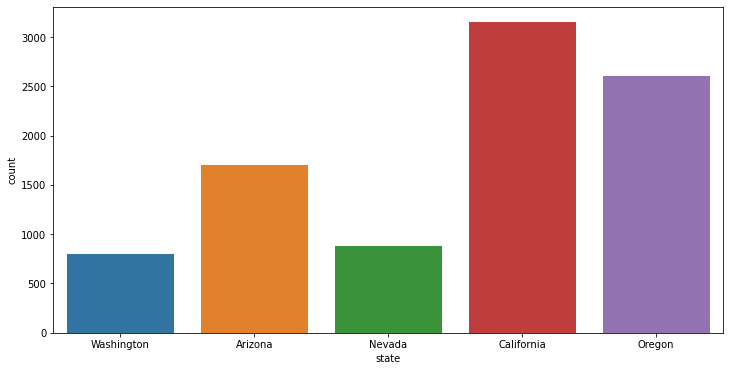

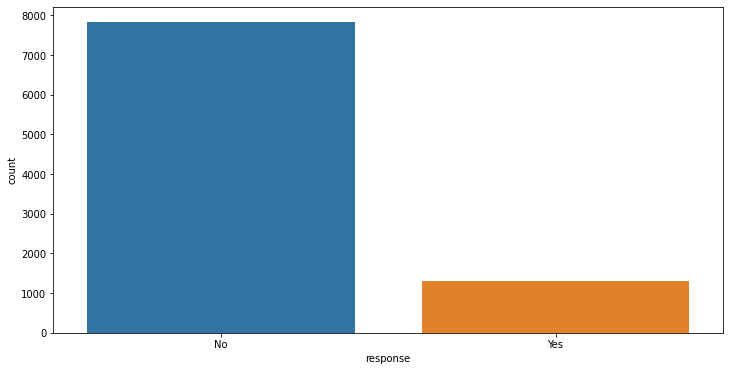

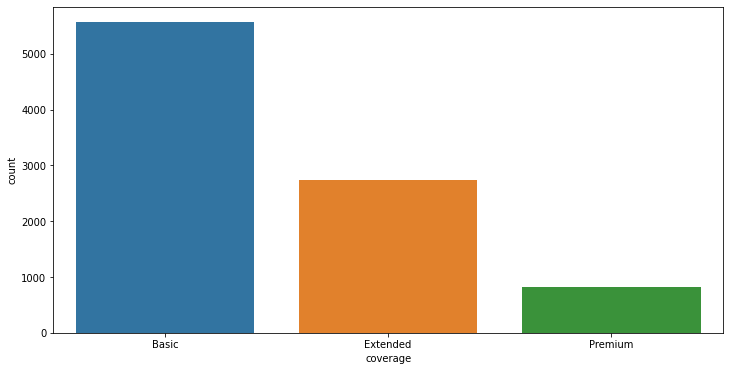

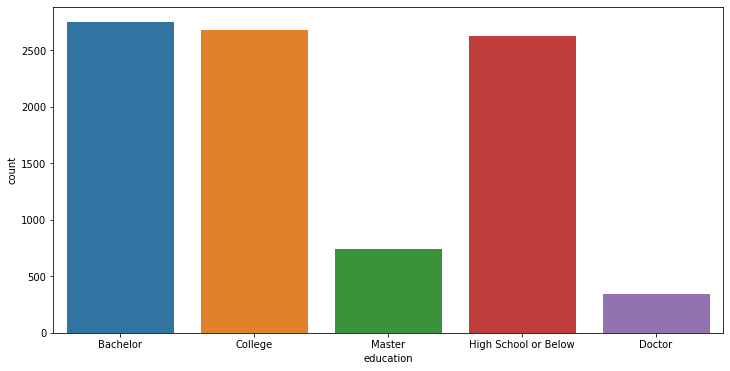

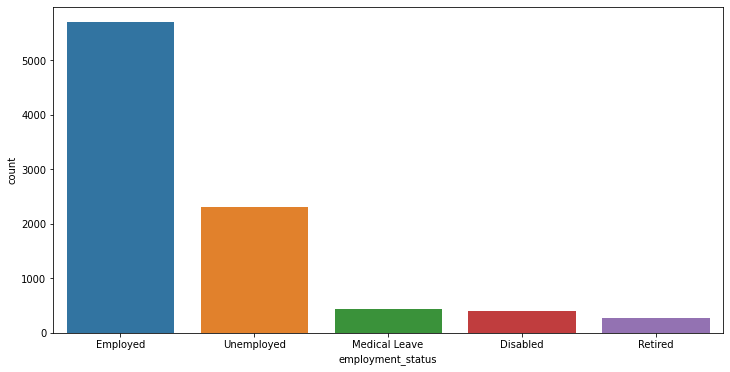

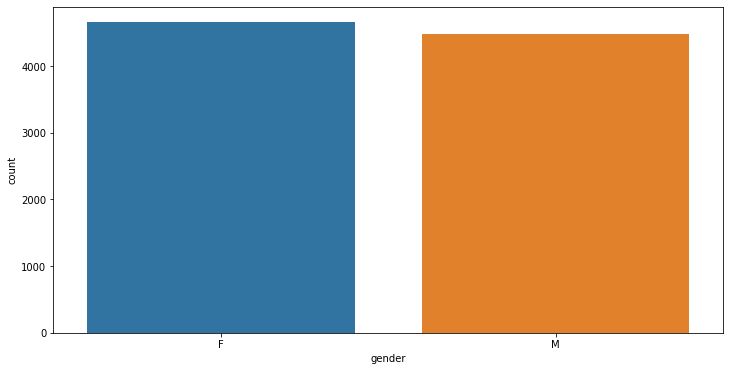

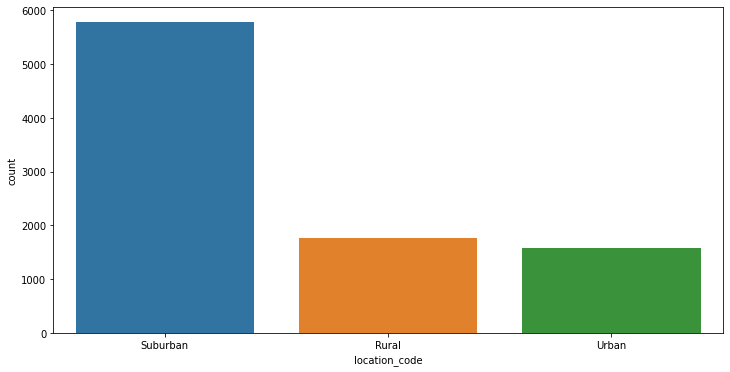

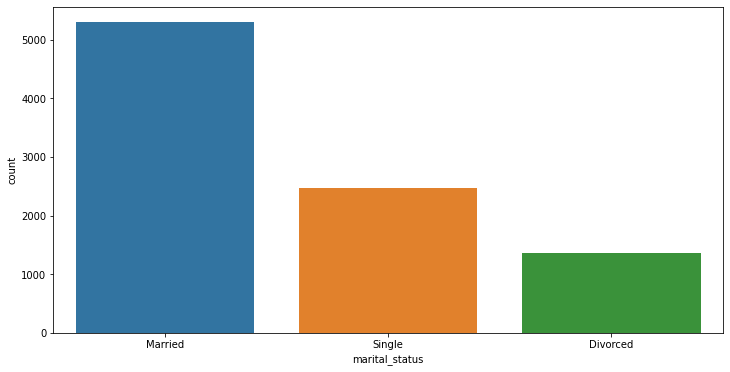

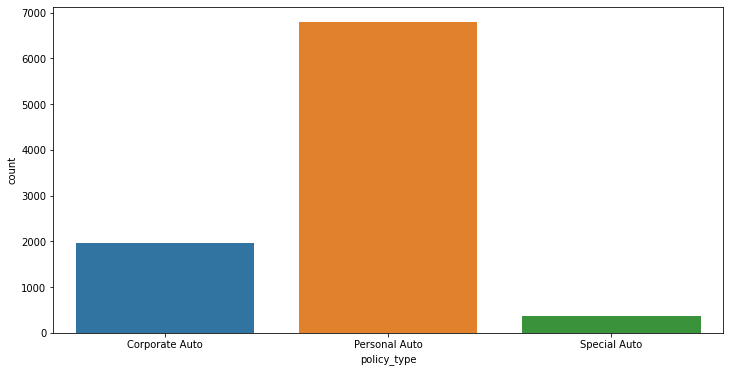

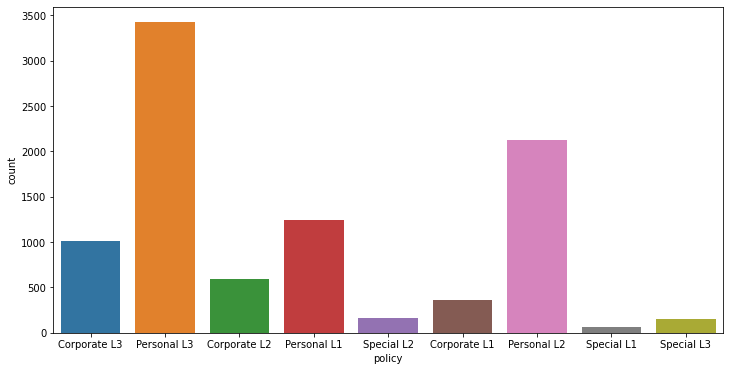

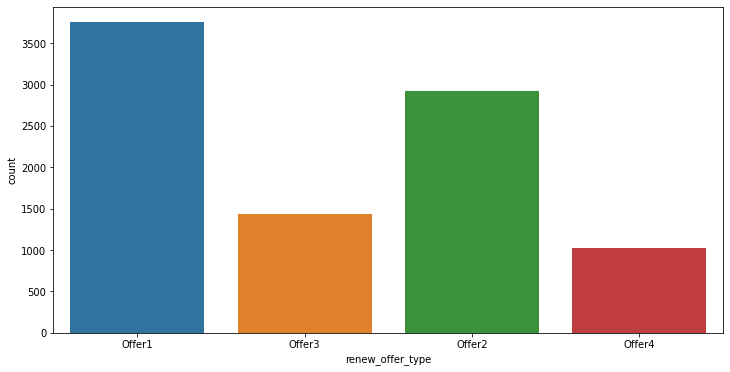

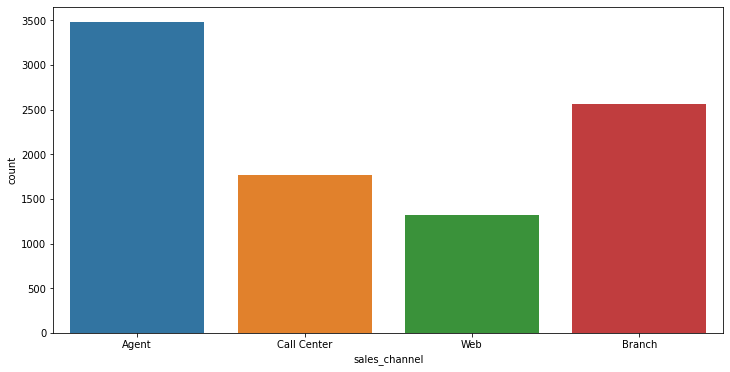

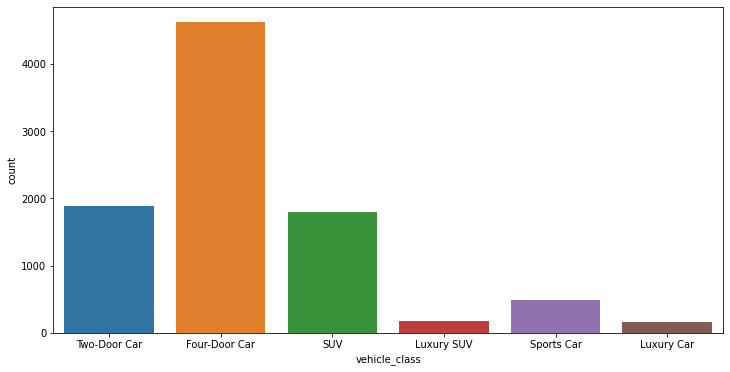

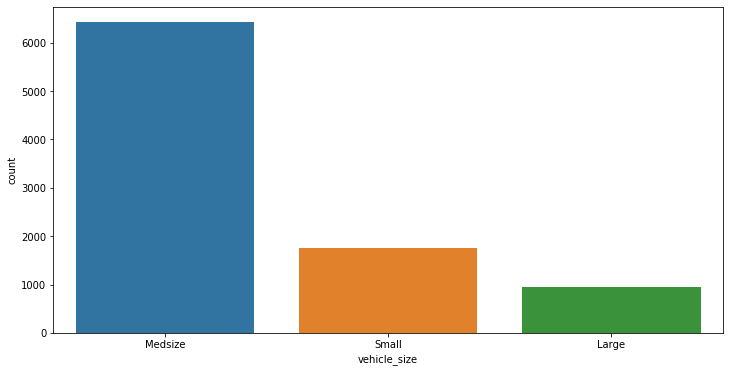

In [4]:
for col in customer_df_categorical.columns:
    plt.figure(figsize=(12,6))
    sns.countplot(x=col, data=customer_df_categorical)
    plt.show()

In [5]:
display(customer_df_date.effective_to_date.head(3).transpose())


customer
BU79786   2011-02-24
QZ44356   2011-01-31
AI49188   2011-02-19
Name: effective_to_date, dtype: datetime64[ns]

In [6]:
# this columns should be changed to month
customer_df_date['year'] = pd.DatetimeIndex(customer_df_date['effective_to_date']).year
customer_df_date['month'] = pd.DatetimeIndex(customer_df_date['effective_to_date']).month
customer_df_date['day'] = pd.DatetimeIndex(customer_df_date['effective_to_date']).day


In [7]:
customer_df_date.drop(columns=["effective_to_date"], inplace=True)
customer_df_date

,year,month,day
customer,,,
BU79786,2011,2,24
QZ44356,2011,1,31
AI49188,2011,2,19
WW63253,2011,1,20
HB64268,2011,2,3
...,...,...,...
LA72316,2011,2,10
PK87824,2011,2,12
TD14365,2011,2,6


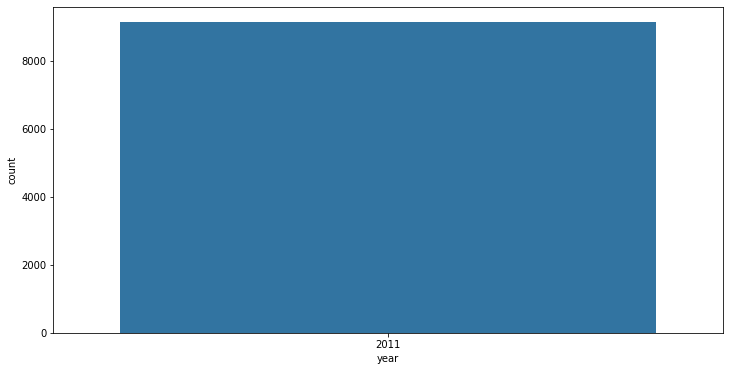

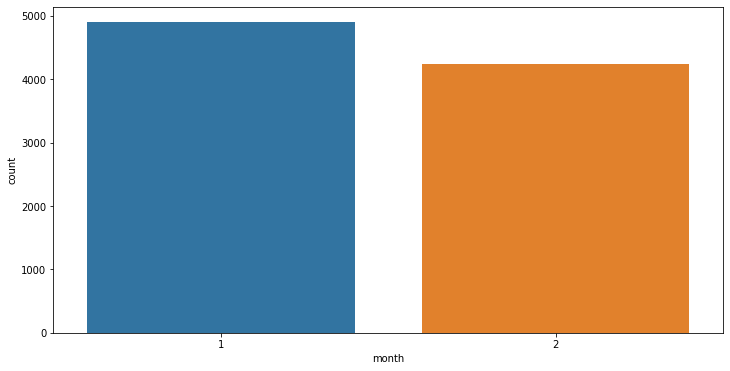

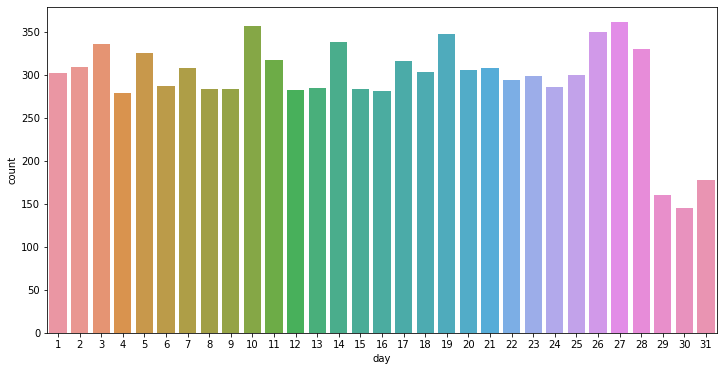

In [8]:
for col in customer_df_date.columns:
    plt.figure(figsize=(12,6))
    sns.countplot(x=col, data=customer_df_date)
    plt.show()

In [9]:
# this dataset is only for the year 2011 the months of january and february
customer_df.head(3).transpose()

customer,BU79786,QZ44356,AI49188
state,Washington,Arizona,Nevada
customer_lifetime_value,2763.519279,6979.535903,12887.43165
response,No,No,No
coverage,Basic,Extended,Premium
education,Bachelor,Bachelor,Bachelor
effective_to_date,2011-02-24 00:00:00,2011-01-31 00:00:00,2011-02-19 00:00:00
employment_status,Employed,Unemployed,Employed
gender,F,F,F
income,56274,0,48767
location_code,Suburban,Suburban,Suburban


In [10]:
for set in [customer_df, customer_df_date, customer_df_numerical, customer_df_categorical, customer_df_continuous, customer_df_discrete]:
    display(set.head(3).transpose())

customer,BU79786,QZ44356,AI49188
state,Washington,Arizona,Nevada
customer_lifetime_value,2763.519279,6979.535903,12887.43165
response,No,No,No
coverage,Basic,Extended,Premium
education,Bachelor,Bachelor,Bachelor
effective_to_date,2011-02-24 00:00:00,2011-01-31 00:00:00,2011-02-19 00:00:00
employment_status,Employed,Unemployed,Employed
gender,F,F,F
income,56274,0,48767
location_code,Suburban,Suburban,Suburban


customer,BU79786,QZ44356,AI49188
year,2011,2011,2011
month,2,1,2
day,24,31,19


customer,BU79786,QZ44356,AI49188
customer_lifetime_value,2763.519279,6979.535903,12887.431650
income,56274.000000,0.000000,48767.000000
monthly_premium_auto,69.000000,94.000000,108.000000
months_since_last_claim,32.000000,13.000000,18.000000
months_since_policy_inception,5.000000,42.000000,38.000000
qty_open_complaints,0.000000,0.000000,0.000000
qty_policies,1.000000,8.000000,2.000000
total_claim_amount,384.811147,1131.464935,566.472247


customer,BU79786,QZ44356,AI49188
state,Washington,Arizona,Nevada
response,No,No,No
coverage,Basic,Extended,Premium
education,Bachelor,Bachelor,Bachelor
employment_status,Employed,Unemployed,Employed
gender,F,F,F
location_code,Suburban,Suburban,Suburban
marital_status,Married,Single,Married
policy_type,Corporate Auto,Personal Auto,Personal Auto
policy,Corporate L3,Personal L3,Personal L3


customer,BU79786,QZ44356,AI49188
customer_lifetime_value,2763.519279,6979.535903,12887.431650
income,56274.000000,0.000000,48767.000000
total_claim_amount,384.811147,1131.464935,566.472247


customer,BU79786,QZ44356,AI49188
state,Washington,Arizona,Nevada
response,No,No,No
coverage,Basic,Extended,Premium
education,Bachelor,Bachelor,Bachelor
effective_to_date,2011-02-24 00:00:00,2011-01-31 00:00:00,2011-02-19 00:00:00
employment_status,Employed,Unemployed,Employed
gender,F,F,F
location_code,Suburban,Suburban,Suburban
marital_status,Married,Single,Married
monthly_premium_auto,69,94,108


In [ ]:
def remove_outliers(df, skip_columns=[], threshold=1.25):
    initial_rows = df.shape[0]
    for col in df.select_dtypes(np.number).columns:
        if col not in skip_columns:
            upper = np.percentile(df[col], 75)  
            lower = np.percentile(df[col], 25)  
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[col]>lower_limit) & (df[col]<upper_limit)]
            assert not df.empty, 'Threshold too high for col: ' + col
        
    print(f'Loss of \
        {round((initial_rows - df.shape[0])/ initial_rows*100, 1)}%\
        of initial data')
    return df

def scale_data(sets, scaler):
    """Applies a scaler class to test and train set"""
    scaled_sets = []
    for set in sets:
        set_scaled = scaler().fit_transform(set.select_dtypes(np.number))
        set[set.select_dtypes(np.number).columns] = set_scaled
        scaled_sets.append(set)
    return scaled_sets


def encode_data(scaled_sets, encoder, cols_to_encode):
    scaled_and_encoded_sets = []
    try:
        for scaled_set in scaled_sets:
            enc = encoder(drop='first').fit(scaled_set[cols_to_encode])
            oh_encoded_scaled_set = pd.DataFrame(enc.transform(scaled_set[cols_to_encode]).toarray())
            oh_encoded_scaled_set= oh_encoded_scaled_set.set_index(scaled_set.index)
            scaled_and_encoded_set = scaled_set.drop(scaled_set[cols_to_encode], axis=1).join(oh_encoded_scaled_set)
            scaled_and_encoded_sets.append(scaled_and_encoded_set)
    except:
        raise
    finally:
        return scaled_and_encoded_sets

In [ ]:
customer_df_numerical = remove_outliers(customer_df_numerical)